In [157]:
# Import the module
import json
import pandas as pd
import requests
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#retrieve theMovieDB.org API key
def get_keys(fname):
    '''
    Init signature: 
        get_keys(fname)
    Docstring:     
        get_keys(filename='') -> dict
        Retrieve API key stored on file.  return a dictionary.
    
    Parameters
    ----------
    fname: 
        json file name where the API key is stored.
      
    '''
    with open(fname) as f:
        return json.load(f)


In [2]:
# Import the api key for movieDB using the get_keys function
keys = get_keys('moviedb.json')

# Assign API value to variabloe
api_key = keys['api_key']


<b>Function get_mtdb_movies explainations:</b>
    <ul>
        <li> The Movie DB web site provides an API to pull data from their source.  However, they have a retriction of supplying on 10,000 movies or 500 pages of movies titles.</li>
        <li>In order to collect all the movies, a for loop to issue the request for the movie data is a sound method.</li>
        <li>The function defines the neccessary request parameters based on the API requirements.</li>
        <li>In the for loop structure, we generate the respond obj, test the request status and proceed to create the
        dataframe on the first go.  Subsequence passes, the new dataframe will be concatenated to the previous one.</li>
    </ul>

In [46]:
# Use TMDB API to retrieve list of movies with primary_release_date greater than 01-01-2010
def get_mtdb_movies():
    '''
    init signature:
        get_mtdb_movies() 
    docstring:
        get_mtdb_movies() -> dataframe
        Using TMDB API to retrive a list of movies
    '''
    # Define get request parameters
    url = 'https://api.themoviedb.org/3/discover/movie?'
    langauge = 'en-US'
    sort_by = 'popularity.desc'
    include_adult = 'false'
    include_video = 'false'
    primary_release_date_gt = '2010-01-01'

    url_param = {
                    'api_key': api_key,
                    'language': langauge,
                    'sort_by': sort_by,
                    'include_adult': include_adult,
                    'include_video': include_video,
                    'primary_release_date.gt': primary_release_date_gt
                }

    for i in range(1,500): 
        # update the page number using the iteration value and pass it to the request parameter
        url_param.update({'page': i})
        # create the response ojb.
        resp = requests.get(url, params=url_param)
        # condition to test if this is the first page
        if resp.status_code == 200 and resp.json()['page'] == 1:
            # create the DataFrame
            df = pd.DataFrame.from_dict(resp.json()['results'])
        # condition to test it is not the first page
        elif resp.status_code == 200 and resp.json().get('page', 10000) < 10000:
            # convert response to dataframe
            a = pd.DataFrame.from_dict(resp.json()['results'])
            # concat the present df (a) with the previous pass.  Note: without the sort parameter, concat fails.
            df = pd.concat([df, a], sort=False)
        # condition to test end of the page
        elif resp.status_code == 200 and resp.json().get('page', 10000) == 10000:
            break
    
    return df


In [ ]:
# Use the function to retrieve movie list from TMDB via their API and create a dataframe
df = get_mtdb_movies()


In [47]:
# Preview the dataframe
df.head()

,popularity,vote_count,video,poster_path,id,adult,backdrop_path,original_language,original_title,genre_ids,title,vote_average,overview,release_date
0,1305.559,591,False,/uPGq1mkEXznUpapDmOSxbsybjfp.jpg,475303,False,/6fkqwqLEcDZOEAnBBfKAniwNxtx.jpg,en,A Rainy Day in New York,"[35, 10749]",A Rainy Day in New York,6.7,Two young people arrive in New York to spend a...,2019-07-26
1,271.489,2483,False,/xBHvZcjRiWyobQ9kxBhO6B2dtRI.jpg,419704,False,/5BwqwxMEjeFtdknRV792Svo0K1v.jpg,en,Ad Astra,"[12, 18, 9648, 878, 53]",Ad Astra,6.0,"The near future, a time when both hope and har...",2019-09-17
2,217.757,546,False,/aQvJ5WPzZgYVDrxLX4R6cLJCEaQ.jpg,454626,False,/qonBhlm0UjuKX2sH7e73pnG0454.jpg,en,Sonic the Hedgehog,"[28, 35, 878, 10751]",Sonic the Hedgehog,7.1,Based on the global blockbuster videogame fran...,2020-02-12
3,272.710,1901,False,/bB42KDdfWkOvmzmYkmK58ZlCa9P.jpg,512200,False,/hreiLoPysWG79TsyQgMzFKaOTF5.jpg,en,Jumanji: The Next Level,"[28, 12, 35, 14]",Jumanji: The Next Level,6.8,As the gang return to Jumanji to rescue one of...,2019-12-04
4,215.930,174,False,/4U7hpTK0XTQBKT5X60bKmJd05ha.jpg,570670,False,/uZMZyvarQuXLRqf3xdpdMqzdtjb.jpg,en,The Invisible Man,"[27, 9648, 878, 53]",The Invisible Man,7.5,When Cecilia's abusive ex takes his own life a...,2020-02-26


In [49]:
# Check the dimension of the dataframe
df.shape

(9980, 14)

In [48]:
# Export initial df to csv since it is a lenghty process to import 500 requests
df.to_csv('raw_tmdb.csv')

In [53]:
# Reset df index.  This will remove the duplicate index cause by the concaatenation of the df's
df2 = df.reset_index()

In [56]:
# Preview df2
df2.head()

,index,popularity,vote_count,video,poster_path,id,adult,backdrop_path,original_language,original_title,genre_ids,title,vote_average,overview,release_date
0,0,1305.559,591,False,/uPGq1mkEXznUpapDmOSxbsybjfp.jpg,475303,False,/6fkqwqLEcDZOEAnBBfKAniwNxtx.jpg,en,A Rainy Day in New York,"[35, 10749]",A Rainy Day in New York,6.7,Two young people arrive in New York to spend a...,2019-07-26
1,1,271.489,2483,False,/xBHvZcjRiWyobQ9kxBhO6B2dtRI.jpg,419704,False,/5BwqwxMEjeFtdknRV792Svo0K1v.jpg,en,Ad Astra,"[12, 18, 9648, 878, 53]",Ad Astra,6.0,"The near future, a time when both hope and har...",2019-09-17
2,2,217.757,546,False,/aQvJ5WPzZgYVDrxLX4R6cLJCEaQ.jpg,454626,False,/qonBhlm0UjuKX2sH7e73pnG0454.jpg,en,Sonic the Hedgehog,"[28, 35, 878, 10751]",Sonic the Hedgehog,7.1,Based on the global blockbuster videogame fran...,2020-02-12
3,3,272.710,1901,False,/bB42KDdfWkOvmzmYkmK58ZlCa9P.jpg,512200,False,/hreiLoPysWG79TsyQgMzFKaOTF5.jpg,en,Jumanji: The Next Level,"[28, 12, 35, 14]",Jumanji: The Next Level,6.8,As the gang return to Jumanji to rescue one of...,2019-12-04
4,4,215.930,174,False,/4U7hpTK0XTQBKT5X60bKmJd05ha.jpg,570670,False,/uZMZyvarQuXLRqf3xdpdMqzdtjb.jpg,en,The Invisible Man,"[27, 9648, 878, 53]",The Invisible Man,7.5,When Cecilia's abusive ex takes his own life a...,2020-02-26


In [59]:
# Remove irrelevent columns for the analysis (data cleaning process)
df2.drop(['index', 'video', 'poster_path', 'adult', 'backdrop_path', 'overview'], axis=1, inplace=True)


In [60]:
# Checking df2
df2.head()

,popularity,vote_count,id,original_language,original_title,genre_ids,title,vote_average,release_date
0,1305.559,591,475303,en,A Rainy Day in New York,"[35, 10749]",A Rainy Day in New York,6.7,2019-07-26
1,271.489,2483,419704,en,Ad Astra,"[12, 18, 9648, 878, 53]",Ad Astra,6.0,2019-09-17
2,217.757,546,454626,en,Sonic the Hedgehog,"[28, 35, 878, 10751]",Sonic the Hedgehog,7.1,2020-02-12
3,272.710,1901,512200,en,Jumanji: The Next Level,"[28, 12, 35, 14]",Jumanji: The Next Level,6.8,2019-12-04
4,215.930,174,570670,en,The Invisible Man,"[27, 9648, 878, 53]",The Invisible Man,7.5,2020-02-26


In [64]:
# Output the column names to use in the duplicated subset parameter
df2.columns

Index(['popularity', 'vote_count', 'id', 'original_language', 'original_title',
       'genre_ids', 'title', 'vote_average', 'release_date'],
      dtype='object')

In [146]:
# Check for row duplication (data cleaning process).  Exclude column genre_ids becuase it contains list elements
df2.duplicated(subset=['popularity', 'vote_count', 'id',
                       'original_language', 'original_title',
                       'title', 'vote_average', 'release_date']).sum()

0

In [61]:
# Check for duplicate title (data cleaning process)
df2.title.duplicated().sum()

316

In [69]:
# Investigate the duplicate titles.  Preview of the duplicate titles
df2.loc[df2.title.duplicated(),:]

,popularity,vote_count,id,original_language,original_title,genre_ids,title,vote_average,release_date
111,30.211,7417,812,en,Aladdin,"[12, 16, 14, 10749, 10751]",Aladdin,7.6,1992-11-25
118,31.593,11693,8587,en,The Lion King,"[16, 18, 10751]",The Lion King,8.3,1994-05-07
198,29.431,6448,10020,en,Beauty and the Beast,"[16, 14, 10749, 10751]",Beauty and the Beast,7.7,1991-11-13
212,18.464,2564,2907,en,The Addams Family,"[35, 14]",The Addams Family,7.0,1991-11-22
287,22.063,2638,4327,en,Charlie's Angels,"[28, 12, 35, 80, 53]",Charlie's Angels,5.7,2000-11-02
...,...,...,...,...,...,...,...,...,...
9845,7.510,138,44678,en,Altitude,"[27, 28, 53, 878]",Altitude,4.9,2010-10-10
9871,8.505,394,17529,en,True Grit,"[18, 37]",True Grit,7.4,1969-06-11
9929,5.684,31,32528,en,Spartacus,"[28, 18, 36, 10770]",Spartacus,7.0,2004-03-17
9935,8.754,221,38780,en,Rampage,"[28, 80, 18, 9648, 53]",Rampage,6.0,2009-08-14


In [72]:
# Spot checking the titles.  They appear to be re-make.  Will keep the records.
df2[(df2['title'] == 'Aladdin') | (df2['title'] == 'Rampage') | (df2['title'] == 'The Addams Family')]

,popularity,vote_count,id,original_language,original_title,genre_ids,title,vote_average,release_date
40,50.073,601,481084,en,The Addams Family,"[16, 35, 14, 10751]",The Addams Family,6.2,2019-10-10
42,46.144,4930,420817,en,Aladdin,"[12, 35, 14, 10749, 10751]",Aladdin,7.0,2019-05-22
111,30.211,7417,812,en,Aladdin,"[12, 16, 14, 10749, 10751]",Aladdin,7.6,1992-11-25
212,18.464,2564,2907,en,The Addams Family,"[35, 14]",The Addams Family,7.0,1991-11-22
724,19.886,3745,427641,en,Rampage,"[28, 12, 14, 878]",Rampage,6.2,2018-04-12
9935,8.754,221,38780,en,Rampage,"[28, 80, 18, 9648, 53]",Rampage,6.0,2009-08-14


In [79]:
# Check for nan value (data cleaning process)
df2.isnull().sum()

popularity           0
vote_count           0
id                   0
original_language    0
original_title       0
genre_ids            0
title                0
vote_average         0
release_date         4
dtype: int64

In [80]:
# Review the NaN in the release_date column as reported above
df2.loc[df2.release_date.isnull(), :]

,popularity,vote_count,id,original_language,original_title,genre_ids,title,vote_average,release_date
1333,17.487,0,504075,zh,战狼3,"[28, 10752]",Wolf Warrior 3,0.0,NaN
4873,5.838,0,425274,en,Now You See Me 3,"[80, 53]",Now You See Me 3,0.0,NaN
6421,5.954,0,374771,en,Riddick 4: Furya,"[28, 878]",Riddick 4: Furya,0.0,NaN
9056,4.547,0,425770,ta,சதுரங்க வேட்டை 2,"[28, 80, 53]",Sathuranga Vettai 2,0.0,NaN


In [94]:
# 1) Since we are intertested in 'original_language' = en, we will drop zh and ta
# 2) lookk up the release_date for the other two movies online, index id 4873 & 6421

# Remove row 1333 & 9056
df2.drop(index=[1333, 9056], axis=0, inplace=True)

In [95]:
# Check that zh & ta are in fact removed
df2.loc[df2.release_date.isnull(), :]

,popularity,vote_count,id,original_language,original_title,genre_ids,title,vote_average,release_date
4873,5.838,0,425274,en,Now You See Me 3,"[80, 53]",Now You See Me 3,0.0,NaN
6421,5.954,0,374771,en,Riddick 4: Furya,"[28, 878]",Riddick 4: Furya,0.0,NaN


In [98]:
#  Both 4873 and 6421 are 2020 films and has yet to anounce a release date set in 2020.  Remove from df.
df2.drop(index=[4873, 6421], axis=0, inplace=True)


In [99]:
# Re check isnull status
df2.isnull().sum()

popularity           0
vote_count           0
id                   0
original_language    0
original_title       0
genre_ids            0
title                0
vote_average         0
release_date         0
dtype: int64

<b>function get_movie_bud_rev explantions:</b>
 <ul>
    <li>The TMDB API also provide a way to get more details about a movie, suh as the revenue and budget data, which
        are not included in the initial data gathering.  They are crucial in our analysis.</li>
    <li>We can slightly modify the function get_mtdb_movies to achieve this goal by changing the url parameter.</li>
 </ul>

In [104]:
# Create a function to send request to pull movie details.  Interested in the revenue and the budget values
def get_movie_bud_rev(movieid,rev_bud='revenue'):
    '''
    Init signature:
        get_movie_bud_rev(movie_id, rev_bud='revenue')
    Docstring:     
        get_movie_bud_rev(movie_id, rev_bud='revenue') -> dict
        Retrieve the revenue (default) or the budget info from the reponse object
    
    Parameters
    ----------
    movie_id: 
        TMDB movie id as int
    rev_bud: 
        A string input (revenue | budget) to represent the dictionary key to search in the response object

    '''
    # define get request parameters
    url = 'https://api.themoviedb.org/3/movie/' + str(movieid) + '?'
    url_param = {
                    'api_key': api_key,
                    'language': 'en-US',
                }
    resp = requests.get(url, params=url_param)
    if resp.status_code == 200:
        resp_bud_rev = resp.json()[rev_bud]
    else:
        resp_bud_rev = np.nan
  
        
    return resp_bud_rev


In [ ]:
# Create the revenue columns in the dataframe and populate the column using the get_movie_bud_rev function
df2['revenue'] = df2['id'].apply(lambda x: get_movie_bud_rev(x, 'revenue'))


In [ ]:
# Create the budget column in the dataframe and populate the column using the get_movie_bud_rev function
df2['budget'] = df2['id'].apply(lambda x: get_movie_bud_rev(x, 'budget'))

In [ ]:
# Preview revenue & budget column 
df2.head()

In [112]:
# Check for NAN in revenue & budget coliumns
df2.revenue.isnull().sum(), df2.budget.isnull().sum()

(1, 1)

In [115]:
# Review the row to decide what to do
df2.loc[df2.revenue.isnull(), :]

,popularity,vote_count,id,original_language,original_title,genre_ids,title,vote_average,release_date,revenue,budget
2599,9.768,0,627494,en,When Calls the Heart: Home for Christmas,[],When Calls the Heart: Home for Christmas,0.0,2019-12-25,NaN,NaN


In [118]:
# Since the movie title is missing a lot of useful info, drop the row
df2.drop(index=[2599], axis=0, inplace=True)

<b>Function get_genre explanation:</b>
    <ul>
        <li>The genre classification are represented by interger ID.  In order to translate to more meaning terms, we need to retrieve the corresponding name for those IDs.</li>
        <li>API is available to pull this genre titles.</li>
        <li>get_genre has the similar structure as get_movie_bud_rev function.  We only need to modify the URL to extract the genre names.</li>
    </ul>

In [119]:
# Get the genre id classification from TMDB web site
def get_genre():
    '''
    Init signature:
        get_genre()
    Docstring:
        get_genre() -> dict
        Retrieve the genre IDs and names stored as key:value dictionary.
    Parameters:
        none
    
    '''
    # Create the response object
    g_resp = requests.get(
        'https://api.themoviedb.org/3/genre/movie/list?api_key='
        + str(api_key) + '&language=en-US'
        )
    # if get request is successful, store genres name in dict.
    if g_resp.status_code == 200:
        genre_dict =  sorted(g_resp.json()['genres'], key=lambda x: x['id'])
        
    return genre_dict
        

<b>Function match_genre_id Explantions:</b>
 <ul>
    <li>This function will retrieve the genre id list from the dataframe as the first step.</li>
    <li>In a nested for loop, it retrieves the first element in the id to name mapping dictionary.  Next it loop through the genre id list to find the matching key.</li>
    <li>If key matched, it append the key value to the genre_name list object, which will be returned by the function to populate the new column in the dataframe.</li>
 <ul/>

In [120]:
# map TMDB genre_id to genre_name
def match_genre_id(gid):
    '''
    Init signature:
        match_genre_id(gid)
    Docstring:
        match_genre_id(gid) -> list
        Take input genre id and match it to the "genre id:genre name" dict to retrieve the genre name
    Parameters:
        gid: The value in the genre_id column of the dataframe
    '''
    # Initiate an empty list to store the matching genre name
    genre_name = []
    # call get_genre function to pull the genre id/name from TMDB
    genre_dict = get_genre()
    # Match gerne id to pull gerne name
    for i in gid:
        for j in genre_dict:
            if j['id'] == i:
                genre_name.append(j['name'])
    
    return genre_name


In [122]:
# Create a new coluimn to store genre_name
df2['genre_names'] = df2['genre_ids'].apply(lambda x: match_genre_id(x))


In [125]:
# Took 20 min to run match_genre_id, create a backup
df2.to_csv('add_genre_name_tmdb.cdv')


In [ ]:
# Convert column release_date from string to datatime data type
import datetime

df2['release_date'] = pd.to_datetime(df2['release_date'])

# Note to self: above method is more useful in comparison to using str yyyy-mm-dd to str yyyy
# df2['release_date'] = df2['release_date'].map(lambda x: x[0:4] if not pd.isnull(x) else x)


In [168]:
# divide revenue column by 1,000,000 for easy readability and graphing
df2['revenue'] = round(df2['revenue'].div(1000000),2)

In [172]:
# divide budget column by 1,000,000 for easy readability and graphing
df2['budget'] = round(df2['budget'].div(1000000),2)

In [208]:
# Export the final dataframe for safeguard
df2.to_csv('final_tmdb.csv', index=False)

In [ ]:
###################################### Graphs ###################################### 

In [4]:
# Load merged data sources.  Mojo & TMDB
mdf = pd.read_csv('mergedData.csv')

In [5]:
# Preview the dataframe
mdf.head()

,Title,Year,Genre,Rating,Score,Director,Stars,Gross,Popularity,Vote_Count,Id,Original_Language,Original_Title,Genre_Ids,Vote_Average,Release_Date,Revenue,Budget,Genre_y,Log Gross
0,Parasite,2019,Comedy Drama Thriller,8.6,96.0,Bong Joon Ho,"['Kang-ho Song', 'Sun-kyun Lee', 'Yeo-jeong Jo...",51479136,148.987,4756,496243,ko,기생충,"[35, 18, 53]",8.6,2019-05-30,201.06,11.36,"['Comedy', 'Drama', 'Thriller']",17.756687
1,The Invisible Man,2020,Horror Mystery Sci-Fi,7.6,71.0,Leigh Whannell,"['Elisabeth Moss', 'Oliver Jackson-Cohen', 'Ha...",28205665,215.930,174,570670,en,The Invisible Man,"[27, 9648, 878, 53]",7.5,2020-02-26,0.00,9.00,"['Horror', 'Mystery', 'Science Fiction', 'Thri...",17.155033
2,Knives Out,2019,Comedy Crime Drama,8.0,82.0,Rian Johnson,"['Daniel Craig', 'Chris Evans', 'Ana de Armas'...",164655243,96.543,2485,546554,en,Knives Out,"[35, 80, 18, 9648, 53]",7.8,2019-11-27,163.70,40.00,"['Comedy', 'Crime', 'Drama', 'Mystery', 'Thril...",18.919364
3,Sonic the Hedgehog,2020,Action Adventure Comedy,6.8,47.0,Jeff Fowler,"['Ben Schwartz', 'James Marsden', 'Jim Carrey'...",128555045,217.757,546,454626,en,Sonic the Hedgehog,"[28, 35, 878, 10751]",7.1,2020-02-12,265.49,85.00,"['Action', 'Comedy', 'Science Fiction', 'Family']",18.671868
4,Jojo Rabbit,2019,Comedy Drama War,8.0,58.0,Taika Waititi,"['Roman Griffin Davis', 'Thomasin McKenzie', '...",33122789,68.363,2208,515001,en,Jojo Rabbit,"[35, 18, 10752]",8.1,2019-10-18,82.47,14.00,"['Comedy', 'Drama', 'War']",17.315732


In [6]:
# Check non-zero value cells in revenue and budget columns
np.transpose(mdf.Revenue.to_numpy().nonzero()).shape, np.transpose(mdf.Budget.to_numpy().nonzero()).shape

((3568, 1), (3410, 1))

In [7]:
# Set up condition to filter cell that have 0 values
condition = (mdf.Revenue != 0) & (mdf.Budget != 0)

# Filter out rows where there is a 0 in both revenue & budget
temp = mdf[condition]

In [8]:
# Create the goupby year obj. for calculating mean on revenue and budget
filtered_rb = mdf[condition].groupby('Year')

In [9]:
# Review the descriptive stastistics
filtered_rb[('Revenue', 'Budget')].describe()

Revenue                                                               \
       count        mean         std     min       25%      50%       75%   
Year                                                                        
1927     1.0    0.650000         NaN    0.65    0.6500    0.650    0.6500   
1937     1.0  184.930000         NaN  184.93  184.9300  184.930  184.9300   
1939     2.0  216.965000  259.105138   33.75  125.3575  216.965  308.5725   
1940     1.0   84.300000         NaN   84.30   84.3000   84.300   84.3000   
1941     1.0   23.220000         NaN   23.22   23.2200   23.220   23.2200   
...      ...         ...         ...     ...       ...      ...       ...   
2016   136.0  174.342794  246.754485    0.78   22.9800   83.970  189.3925   
2017   109.0  212.360917  265.767957    1.60   41.0600  113.230  259.2400   
2018   116.0  199.943362  331.784505    2.02   24.4500   62.530  247.1550   
2019    84.0  253.493571  437.015481    0.36   33.5825   93.465  224.0225   
2020     8.0   61.238750   86.286396    8.04   20.7900   25.860   47.9850   

              Budget                                                      \
          max  count       mean        std    min     25%    50%     75%   
Year                                                                       
1927     0.65    1.0  92.620000        NaN  92.62  92.620  92.62  92.620   
1937   184.93    1.0   1.490000        NaN   1.49   1.490   1.49   1.490   
1939   400.18    2.0   3.390000   0.862670   2.78   3.085   3.39   3.695   
1940    84.30    1.0   2.600000        NaN   2.60   2.600   2.60   2.600   
1941    23.22    1.0   0.840000        NaN   0.84   0.840   0.84   0.840   
...       ...    ...        ...        ...    ...     ...    ...     ...   
2016  1153.30  136.0  54.239559  58.582406   1.50  10.300  30.75  71.250   
2017  1238.76  109.0  59.018532  61.782451   0.10  19.000  34.00  80.000   
2018  2046.24  116.0  54.015517  58.705983   0.90  13.875  33.00  70.000   
2019  2797.80   84.0  63.869762  66.060109   0.05  17.500  40.00  95.650   
2020   265.49    8.0  58.750000  60.513871   5.00   9.250  39.50  91.000   

              
         max  
Year          
1927   92.62  
1937    1.49  
1939    4.00  
1940    2.60  
1941    0.84  
...      ...  
2016  250.00  
2017  300.00  
2018  300.00  
2019  356.00  
2020  175.00  

[77 rows x 16 columns]

<b>Revenue & Budget Mean Over Year Graph</b>
    <ul>
    <li>To answer the question whether producing movies will be profitable, we can look at the revenues/costs trending for the last few decades.</li>
    <li>The graph plot the revenue and the budget mean over years.  It indicates both revenues and budgets are rising .  There seems to be a positive correlation between the two.</li>
    <li>Examine the distance between the revenue and the budget plot line, it would suggest the profit margin remains positive, despite the rising costs.</li>
    <li>The anomalies show on the graph for year around late 1930s and 1950 are due to the lack of data for that period.  As a result the mean of those time period skyrocketed.</li>
    </ul>

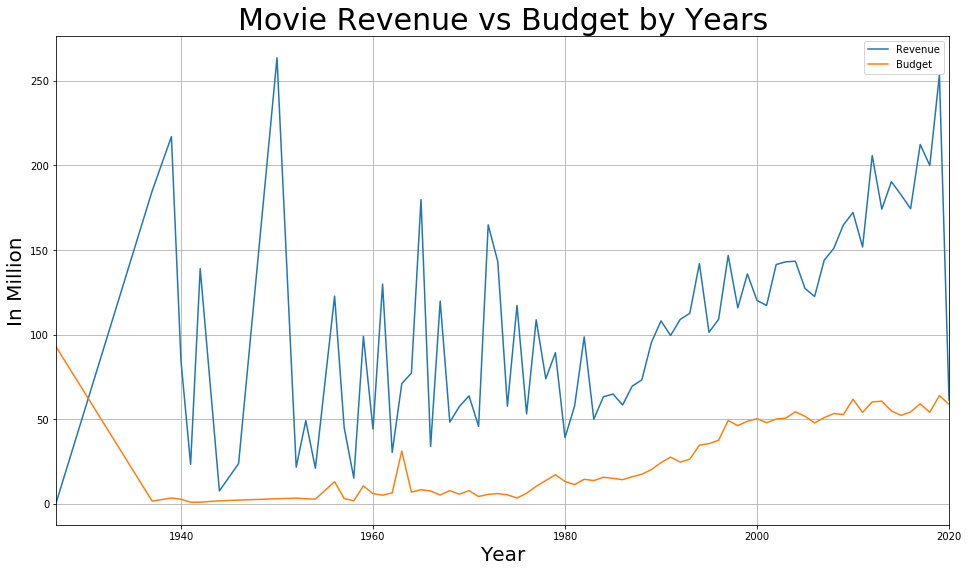

In [154]:
# Ploting the revenue & budget mean over years to see the treding of the movie market
ax =filtered_rb[('Revenue', 'Budget')].mean().plot(figsize=(16,9), title='Movie Revenue vs Budget by Years', grid=True)
ax.set_xlabel("Year", fontsize=20)
ax.set_ylabel("In Million", fontsize=20)
ax.title.set_size(30)
plt.show()

In [133]:
# Create a temporary dataframe for the director graph
t=filtered_rb[('Revenue', 'Budget')].mean().reset_index()

In [11]:
# Create a groupby obj. by director.  
rev_dtor = mdf.groupby('Director')

In [12]:
# Create a plot obj of 25 revenue mean by directors
t_25dct = rev_dtor.Revenue.mean().sort_values(ascending=False)[0:25]

<b>The Top 25 Directors with Their Average Movie Gross Chart</b>
    <ul>
    <li>If we do decided to make a movie, what strategies can we deploy to make it a success?</li>
    <li>This graph may be used as an approach.  If movie stars are the soul the movie, then directors are its brain.
    <li>Naturally, the next question is should we hire less well know director to save on costs and maximize return on investment.  Or should we hire high caliber directors for the project to ensure better chance of success of the film?  Equip with the track records of the directors from the plot.  We can make the approciate selection in turns plan for a sound budget allocation</li>        
    </ul>

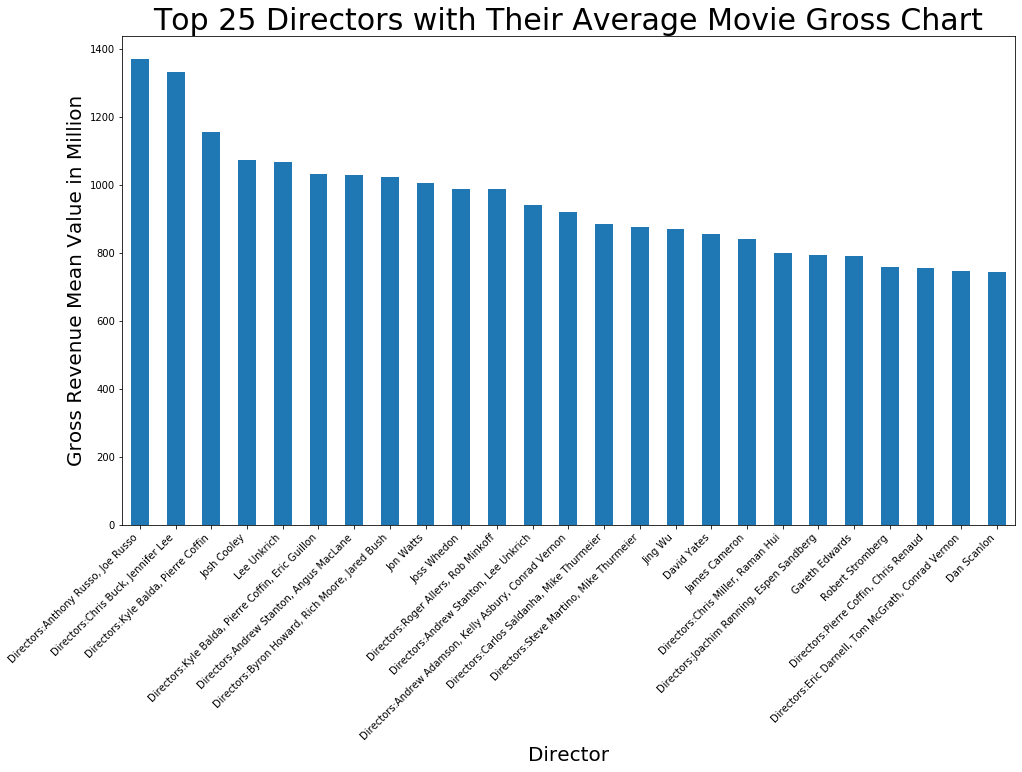

In [13]:
# Plot the graph.
ax = t_25dct.plot(kind='bar',figsize=(16,9), title='Top 25 Directors with Their Average Movie Gross Chart')
ax.set_xlabel("Director", fontsize=20)
ax.set_ylabel("Gross Revenue Mean Value in Million", fontsize=20)
ax.title.set_size(30)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.show()

<b>Function genres_split Explanations:</b>
    <ul>
    <li>Since the genre name is store as a list, we need to parse it out and store in a new coluimn.</li>
    <li>This function will take the first element from the list and assign it to the new column</li>
    </ul>

In [14]:
# Function to parse Genre name string
def genres_split(genre_str):
    '''
    Init_signature:
        genres_split(genre_str)
    Docstring:
        genres_split(genre_str) -> str
        Take input Genre and split the string and extrace the first element as the main Genre for the movie.
    Parameters:
        genre_str is the value in the Genre column of the dataframe 
    '''
    x = genre_str.split(' ')
    if len(x) != 0:
        return x[0]
    else:
        return 'NA'


In [16]:
# Update the main_genre with the first item in the Genre column strings
mdf['main_genre'] = mdf.Genre.map(genres_split)
              

In [185]:
# Create a subset of the dataframe for the period 2009 to 2019 for analysis
mdf09_19 = mdf[(pd.DatetimeIndex(mdf.Release_Date).year >= 2009) & (pd.DatetimeIndex(mdf.Release_Date).year <= 2019)]


<b>The Top Box Office Grossing Movie by Genres Graph</b>
<ul>
    <li>This graph will try to answer the question, what type of movie should we make?  We are our audience taste of movie for the last five to ten years.</li>
    <li>By plotting out the performances of each movie genre for the last ten years.  We can get a sense of our audience movie genre preferrences.  This is an important factor to consider when making a new movie.</li>
<ul>

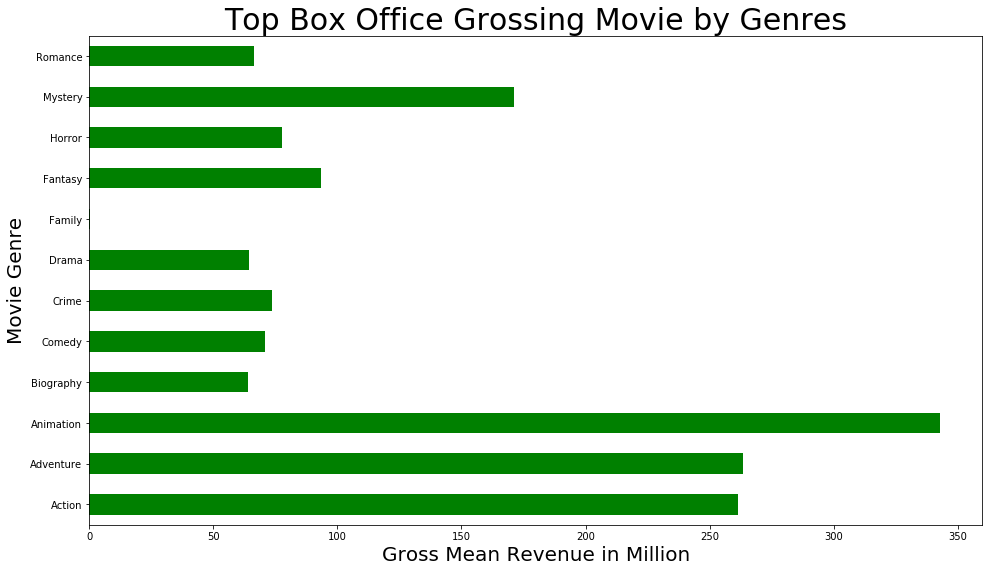

In [412]:
# Plot the graph for each genre with their Gross mean
ax = mdf09_19.groupby('main_genre')['Revenue'].mean().plot(kind='barh',
                                                   figsize=(16,9),
                                                   title='Top Box Office Grossing Movie by Genres',
                                                   color = 'green'
                                                  )

ax.set_xlabel("Gross Mean Revenue in Million", fontsize=20)
ax.set_ylabel("Movie Genre", fontsize=20)
ax.title.set_size(30)
plt.show()


<b>The Number of Titles by Genres by Year Graph</b>
    <ul>
    <li>The purpose of this chart is to show the saturation of the movie genres market segment.</li>
    <li>This is supplement the Top Box Office Grossing Movie by Genres graph.  By evaluating both charts, we can see that the animation genre is on the rise, which might explain why it is the top on the Gross Mean Revenue chart.  On the other hand, both action and adventure titles seem to be on a decline yet they still perform well in the market, based on the Gross Mean Revenue chart.  To avoid a saturated market, it might be a better choice to produce action or adventure genre type of movies        </li>
    </ul>

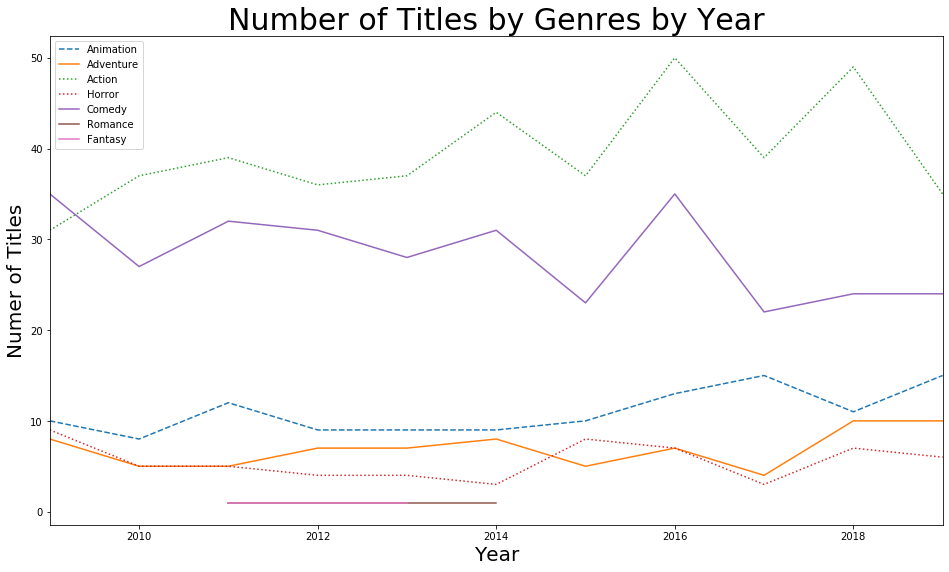

In [411]:
ax = ((mdf09_19[(mdf09_19['main_genre'] == 'Animation')])
 .loc[:,['Year','Title']].groupby('Year')['Title'].count().plot(kind='line', figsize=(16,9),
 title='Number of Titles by Genres by Year',style='--'))
ax = ((mdf09_19[(mdf09_19['main_genre'] == 'Adventure')])
 .loc[:,['Year','Title']].groupby('Year')['Title'].count().plot(kind='line'))
ax = ((mdf09_19[(mdf09_19['main_genre'] == 'Action')])
 .loc[:,['Year','Title']].groupby('Year')['Title'].count().plot(kind='line', style=':'))
ax = ((mdf09_19[(mdf09_19['main_genre'] == 'Horror')])
 .loc[:,['Year','Title']].groupby('Year')['Title'].count().plot(kind='line', style=':'))
ax = ((mdf09_19[(mdf09_19['main_genre'] == 'Comedy')])
 .loc[:,['Year','Title']].groupby('Year')['Title'].count().plot(kind='line'))
ax = ((mdf09_19[(mdf09_19['main_genre'] == 'Romance')])
 .loc[:,['Year','Title']].groupby('Year')['Title'].count().plot(kind='line'))
ax = ((mdf09_19[(mdf09_19['main_genre'] == 'Fantasy')])
 .loc[:,['Year','Title']].groupby('Year')['Title'].count().plot(kind='line'))

ax.set_xlabel("Year", fontsize=20)
ax.set_ylabel("Numer of Titles", fontsize=20)
ax.title.set_size(30)
ax.legend(["Animation","Adventure","Action","Horror","Comedy","Romance","Fantasy"])

plt.show()

In [ ]:
###################################### end ###################################### 